In [24]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.3.0'

In [25]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [26]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
#Importing important libraries
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
#To enable plotting graphs in Jupyter notebook
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.layers import Activation, Dense
from keras.layers import BatchNormalization, Dropout
from keras import optimizers
import tensorflow as tf
import h5py
h5f= h5py.File('/content/drive/MyDrive/Colab Notebooks/SVHN_single_grey1.h5')
h5f.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [28]:
X_train= h5f['X_train']
X_test= h5f['X_test']
X_val= h5f['X_val']
y_train= h5f['y_train']
y_test= h5f['y_test']
y_val= h5f['y_val']

In [29]:
print("Training data X--Shape:", X_train.shape)
print("Testing data X--Shape:", X_test.shape)
print("Validation data X--Shape:", X_val.shape)
print("Training data y--Shape:", y_train.shape)
print("Testing data y--Shape:", y_test.shape)
print("Validation data y--Shape:", y_val.shape)

Training data X--Shape: (42000, 32, 32)
Testing data X--Shape: (18000, 32, 32)
Validation data X--Shape: (60000, 32, 32)
Training data y--Shape: (42000,)
Testing data y--Shape: (18000,)
Validation data y--Shape: (60000,)


Visualizing the dataset

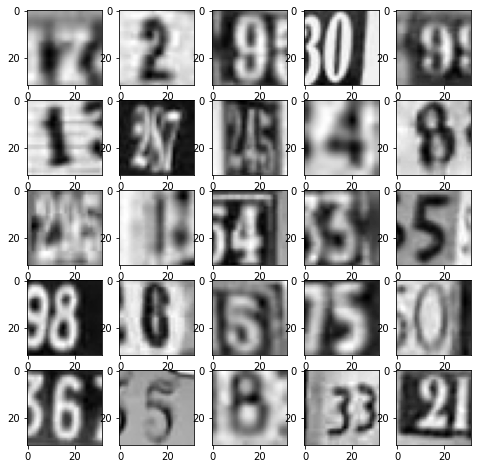

In [30]:
fig=plt.figure(figsize=(8,8))
rows=5
columns=5
for i in range(1, rows*columns+1):
  img=X_test[i]
  fig.add_subplot(rows,columns,i)
  plt.imshow(img,cmap='gray')
plt.show()

In [31]:
print("Data Type of X_train:", X_train.dtype)
print("Data Type of X_test:", X_test.dtype)
print("Data Type of X_val:", X_val.dtype)
print("Data Type of y_train:", y_train.dtype)
print("Data Type of y_test:", y_test.dtype)
print("Data Type of y_val:", y_val.dtype)

Data Type of X_train: float32
Data Type of X_test: float32
Data Type of X_val: float32
Data Type of y_train: uint8
Data Type of y_test: uint8
Data Type of y_val: uint8


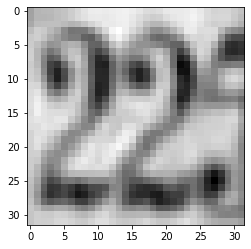

Label:  2


In [32]:
#showing the number in the dataset
plt.imshow(X_train[40], cmap='gray')
plt.show()
print('Label: ', y_train[40])

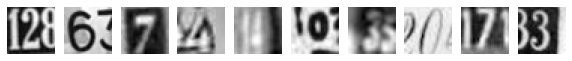

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [33]:
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(32,32),cmap='gray')
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

In [53]:
X_train /= 255
X_test /= 255
X_val /= 255

# Implementing Neural Networks


In [34]:
#Reshaping of train & test sets from 2D to 1D
X_train= np.asarray(X_train).reshape(42000,1024)
X_test= np.asarray(X_test).reshape(18000,1024)
X_val= np.asarray(X_val).reshape(60000,1024)

In [35]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("X_val shape:", X_val.shape)
print("X_train Minimum Value:", X_train.min())
print("X_train Maximum Value:", X_train.max)
print("X_test Minimum Value:", X_test.min)
print("X_test Maximum Value:", X_test.max)
print("X_valMinimum Value:", X_train.min)
print("X_val Maximum Value:", X_train.max)

X_train shape: (42000, 1024)
X_test shape: (18000, 1024)
X_val shape: (60000, 1024)
X_train Minimum Value: 0.0
X_train Maximum Value: <built-in method max of numpy.ndarray object at 0x7f4aff620210>
X_test Minimum Value: <built-in method min of numpy.ndarray object at 0x7f4af3454d00>
X_test Maximum Value: <built-in method max of numpy.ndarray object at 0x7f4af3454d00>
X_valMinimum Value: <built-in method min of numpy.ndarray object at 0x7f4aff620210>
X_val Maximum Value: <built-in method max of numpy.ndarray object at 0x7f4aff620210>


**One hot encoding**

In [36]:
y_train= tf.keras.utils.to_categorical(y_train)
y_test= tf.keras.utils.to_categorical(y_test)
y_val= tf.keras.utils.to_categorical(y_val)

In [37]:
print(X_train.shape, X_test.shape,X_val.shape, y_train.shape, y_test.shape,y_val.shape)

(42000, 1024) (18000, 1024) (60000, 1024) (42000, 10) (18000, 10) (60000, 10)


In [38]:
print("One value of y_train:", y_train[0])

One value of y_train: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [39]:
from tensorflow.keras.layers import Flatten
model = Sequential()
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [56]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [57]:
Fit_model = model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 32, epochs = 10, verbose = 1)

Epoch 1/10
1313/1313 [==============================] - 10s 8ms/step - loss: 1.3830 - accuracy: 0.5419 - val_loss: 1.4018 - val_accuracy: 0.5356
Epoch 2/10
1313/1313 [==============================] - 10s 8ms/step - loss: 1.3821 - accuracy: 0.5428 - val_loss: 1.3814 - val_accuracy: 0.5420
Epoch 3/10
1313/1313 [==============================] - 10s 7ms/step - loss: 1.3809 - accuracy: 0.5426 - val_loss: 1.3759 - val_accuracy: 0.5410
Epoch 4/10
1313/1313 [==============================] - 10s 8ms/step - loss: 1.3866 - accuracy: 0.5426 - val_loss: 1.3564 - val_accuracy: 0.5533
Epoch 5/10
1313/1313 [==============================] - 10s 8ms/step - loss: 1.3785 - accuracy: 0.5453 - val_loss: 1.3917 - val_accuracy: 0.5467
Epoch 6/10
1313/1313 [==============================] - 11s 8ms/step - loss: 1.3775 - accuracy: 0.5444 - val_loss: 1.4784 - val_accuracy: 0.5058
Epoch 7/10
1313/1313 [==============================] - 15s 11ms/step - loss: 1.3765 - accuracy: 0.5457 - val_loss: 1.3810 - val_a

In [59]:
# Input Layer
#Adding Input layer and activation functions ReLU
model.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding BatchNormalization Layer
model.add(BatchNormalization())
#Adding Activation function
model.add(Activation('relu'))
#Adding Dropout Layer
model.add(Dropout(0.5))

#Hidden Layer 1
#Adding first Hidden layer
model.add(Dense(256,kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
model.add(BatchNormalization())
#Adding Activation function
model.add(Activation('relu'))
#Adding Dropout Layer
model.add(Dropout(0.5))

#Hidden Layer 2
#Adding second Hidden layer
model.add(Dense(128, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
model.add(BatchNormalization())
#Adding Activation function
model.add(Activation('relu'))
#Adding Dropout Layer
model.add(Dropout(0.5))

#Hidden Layer 3
#Adding third Hidden layer
model.add(Dense(64, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
model.add(BatchNormalization())
#Adding Activation function
model.add(Activation('relu'))
#Adding Dropout Layer
model.add(Dropout(0.5))

#Hidden Layer 4
#Adding fourth Hidden layer
model.add(Dense(32, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
model.add(BatchNormalization())
#Adding Activation function
model.add(Activation('relu'))
#Adding Dropout Layer
model.add(Dropout(0.5))

# Output Layer
#Adding output layer which is of 10 nodes (digidts)
model.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
model.add(Activation('softmax'))

In [60]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
_________________________________________________________________
dense_4 (Dense)              (None, 512)               5632      
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)              

In [68]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [71]:
Fit_model = model.fit(X_train, y_train, validation_data=(X_test,y_test),batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100
210/210 [==============================] - 6s 28ms/step - loss: 1.4137 - accuracy: 0.5399 - val_loss: 1.2979 - val_accuracy: 0.5573
Epoch 2/100
210/210 [==============================] - 6s 28ms/step - loss: 1.4055 - accuracy: 0.5439 - val_loss: 1.3124 - val_accuracy: 0.5563
Epoch 3/100
210/210 [==============================] - 6s 28ms/step - loss: 1.4106 - accuracy: 0.5414 - val_loss: 1.2965 - val_accuracy: 0.5662
Epoch 4/100
210/210 [==============================] - 6s 28ms/step - loss: 1.4042 - accuracy: 0.5445 - val_loss: 1.3035 - val_accuracy: 0.5614
Epoch 5/100
210/210 [==============================] - 6s 28ms/step - loss: 1.4089 - accuracy: 0.5427 - val_loss: 1.3111 - val_accuracy: 0.5589
Epoch 6/100
210/210 [==============================] - 6s 29ms/step - loss: 1.4071 - accuracy: 0.5416 - val_loss: 1.3151 - val_accuracy: 0.5581
Epoch 7/100
210/210 [==============================] - 6s 29ms/step - loss: 1.3997 - accuracy: 0.5433 - val_loss: 1.2898 - val_accuracy:

In [72]:
model.evaluate(X_test, y_test)

563/563 [==============================] - 2s 4ms/step - loss: 1.2806 - accuracy: 0.5708


[1.2806369066238403, 0.5707777738571167]